# UWGeodynamics Materials

The *UWGeodynamics* module is designed around the idea of materials, which are essentially a way to define physical properties across the Model domain.

First lets define a *Model*:


In [2]:
import UWGeodynamics as GEO

u = GEO.u

Model = GEO.Model(elementRes=(64,64),
                  minCoord=(0.*u.kilometer, 0.* u.kilometer),
                  maxCoord=(64.* u.kilometer, 64 * u.kilometer))

loaded rc file /workspace/user_data/UWGeodynamics/UWGeodynamics/uwgeo-data/uwgeodynamicsrc


Material can then be added to the model as follow. It is a good idea to give the material.
The Model.add_material method will return a Material object. That object is a python object that will then be used to define the property of the material.

Lets create a material called "Material 1".

In [3]:
material1 = Model.add_material(name="Material 1")

Lets now have a look at our newly defined material:

In [5]:
material1

You can see that there is not much defined yet. The material density is 0.0 and the radiogenic heat production is also 0.0. etc.

You can look at the materials defined in the model by calling the Model.materials attribute:

In [4]:
Model.materials

You can see that the attributes contains a list of materials. There are actually 2 materials here, the one we have just defined and the *Model* material.
This is a specificity of the Model object which on top of being the "box" that defines the model space, is also a Material itself.
This basically gives the Model object the ability to behave as a material that you can use to define global variables (variables that will be used as default).

Defaults parameters are usually things like diffusivity, capacity etc. They do not change across the range of materials.

In [ ]:
Model.diffusivity = 1e-6 * u.metre**2 / u.second 
Model.capacity    = 1000. * u.joule / (u.kelvin * u.kilogram)

In [9]:
material1 = Model.add_material(name="Material 1", reset=True)

## Material shape

A material (or a phase) is first defined by the space it takes in the box (its shape).

There is a range of shapes available:
    
- Layers,
- Polygons,
- Box,
- Disk,
- Annulus,
- MultiShape (Combination of any of the above)

### Layers

In [11]:
shape = GEO.shapes.Layer(top=30.*u.kilometer, bottom=0.*u.kilometer)

In [12]:
material2 = Model.add_material(name="Material 2", shape=shape)


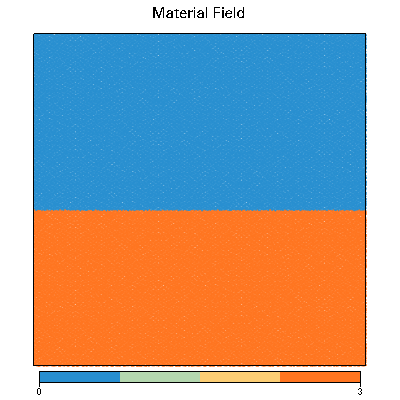

In [13]:
Fig = Model.plot.material(projected=False, figsize=(400, 400), fn_size=3.0)

### Box

In [15]:
box = GEO.shapes.Box(top=10.* u.kilometer, bottom=5*u.kilometer,
                       minX=10.*u.kilometer, maxX=15*u.kilometer)
material4 = Model.add_material(name="Material 3", shape=box)


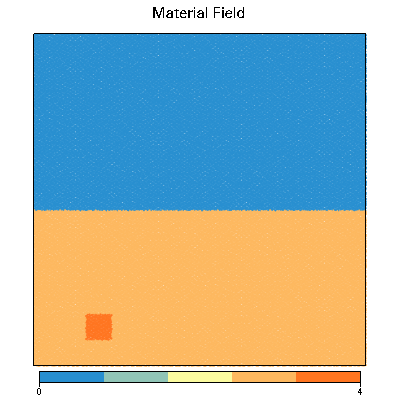

In [17]:
Fig = Model.plot.material(projected=False, figsize=(400, 400), fn_size=3.0)

### Polygon

In [18]:
polygon = GEO.shapes.Polygon(vertices=[(10.* u.kilometer, 10.*u.kilometer),
                                       (20.* u.kilometer, 35.*u.kilometer),
                                       (35.* u.kilometer, 5.*u.kilometer)])
material4 = Model.add_material(name="Material 4", shape=polygon)


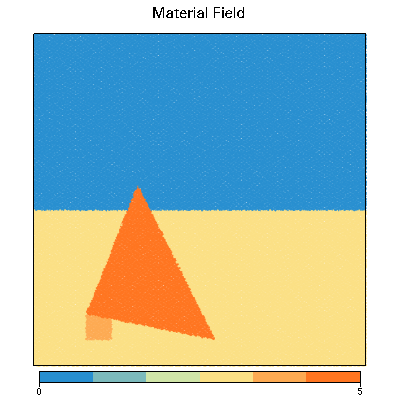

In [19]:
Fig = Model.plot.material(projected=False, figsize=(400, 400), fn_size=3.0)

### Disk

In [20]:
disk = GEO.shapes.Disk(center=(32. * u.kilometer, 32. * u.kilometer), radius=10.*u.kilometer)

material3 = Model.add_material(name="Material 5", shape=disk)


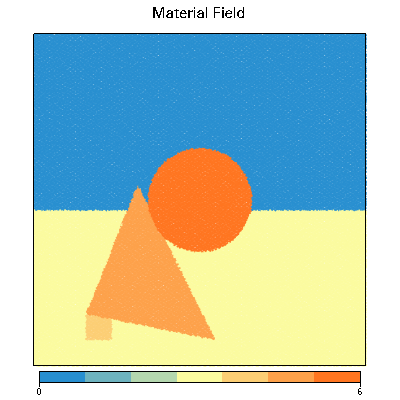

In [21]:
Fig = Model.plot.material(projected=False, figsize=(400, 400), fn_size=3.0)

##### Annulus

In [22]:
annulus = GEO.shapes.Annulus(center=(35.*u.kilometer, 50.*u.kilometer), r1=5.*u.kilometer, r2=10.*u.kilometer)

material5 = Model.add_material(name="Material 6", shape=annulus)


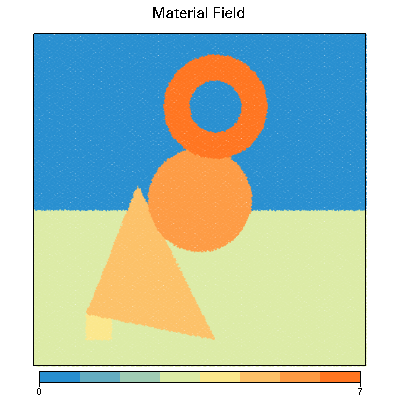

In [23]:
Fig = Model.plot.material(projected=False, figsize=(400, 400), fn_size=3.0)

### Material attributes, property

In [24]:
Model.density = 200. * u.kg / u.m**3
material2.density = 3000 * u.kilogram / u.meter**3


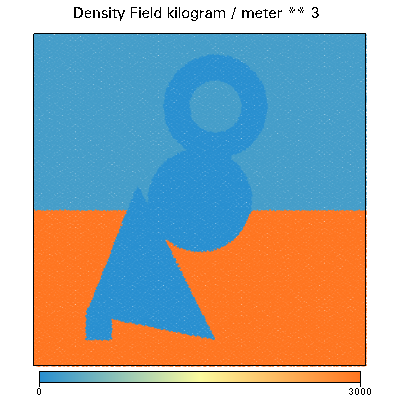

In [26]:
Fig = Model.plot.density(projected=False, figsize=(400, 400), fn_size=3.0)

In [27]:
Model.viscosity = 1e17 * u.pascal * u.second
material2.viscosity = 1e21 * u.pascal * u.second
material3.viscosity = 1e22 * u.pascal * u.second
material4.viscosity = 1e20 * u.pascal * u.second
material5.viscosity = 1e19 * u.pascal * u.second

In [28]:
Fig = Model.plot.viscosity(projected=False, figsize=(400, 400))

Error creating image: 
Key function evaluates to key (4) which
does not appear to map to any functions, and no default function has been set.
